In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
purchase_behaviour.shape

(72637, 3)

In [4]:
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transaction_data.shape

(264836, 8)

In [6]:
#Merging Purchase_behavior and Transaction_Data
merged_data = pd.merge(purchase_behaviour, transaction_data, on = 'LYLTY_CARD_NBR')
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [7]:
merged_data = merged_data.loc[:, ['LYLTY_CARD_NBR','DATE', 'LIFESTAGE','PREMIUM_CUSTOMER','STORE_NBR','TXN_ID','PROD_NBR','PROD_NAME','PROD_QTY','TOT_SALES']]
merged_data.head()

,LYLTY_CARD_NBR,DATE,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,43390,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,43359,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,43531,YOUNG FAMILIES,Budget,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,43532,YOUNG FAMILIES,Budget,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,43406,OLDER SINGLES/COUPLES,Mainstream,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [8]:
merged_data.duplicated().sum()

1

In [9]:
duplicates = merged_data[merged_data.duplicated()]
print(duplicates)

        LYLTY_CARD_NBR   DATE              LIFESTAGE PREMIUM_CUSTOMER  \
106249          107024  43374  OLDER SINGLES/COUPLES          Premium   

        STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
106249        107  108462        45  Smiths Thinly Cut   Roast Chicken 175g   

        PROD_QTY  TOT_SALES  
106249         2        6.0  


In [10]:
merged_data = merged_data.drop_duplicates()

In [11]:
merged_data.duplicated().sum()

0

In [12]:
merged_data.dtypes

LYLTY_CARD_NBR        int64
DATE                  int64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
dtype: object

In [13]:
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'], unit='D', origin='1899-12-30')
merged_data['DATE'].head()

0   2018-10-17
1   2018-09-16
2   2019-03-07
3   2019-03-08
4   2018-11-02
Name: DATE, dtype: datetime64[ns]

In [14]:
merged_data['DATE'].min(), merged_data['DATE'].max() 

(Timestamp('2018-07-01 00:00:00'), Timestamp('2019-06-30 00:00:00'))

# Outliers

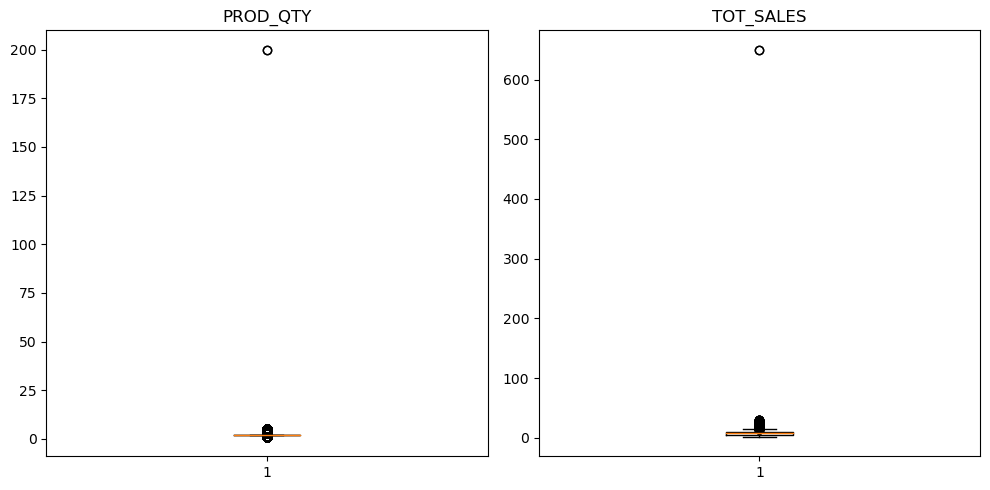

In [15]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(merged_data['PROD_QTY'])
plt.title('PROD_QTY')

plt.subplot(1,2,2)
plt.boxplot(merged_data['TOT_SALES'])
plt.title('TOT_SALES')

plt.tight_layout() #Prevent overlapping/overcrowding
plt.show()

In [16]:
#filtering out any rows where the value in the PROD_QTY and TOT_SALES columns exceed 100 and 500 respectively.
merged_data=merged_data[merged_data["PROD_QTY"]<100]
merged_data=merged_data[merged_data["TOT_SALES"]<500]

#Resetting index of data frame
merged_data=merged_data.reset_index(drop=True)   
merged_data.head()

,LYLTY_CARD_NBR,DATE,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,2018-10-17,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,2018-09-16,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,2019-03-07,YOUNG FAMILIES,Budget,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,2019-03-08,YOUNG FAMILIES,Budget,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,2018-11-02,OLDER SINGLES/COUPLES,Mainstream,1,5,96,WW Original Stacked Chips 160g,1,1.9


# Examining PROD_NAME Column 

In [17]:
merged_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [18]:
import re

# Get unique words in PROD_NAME
product_words = set(merged_data["PROD_NAME"].str.lower().str.split(expand=True).stack().unique())

# Remove words with digits and special characters
product_words = [word for word in product_words if not re.match(r'^\W+|\d+', word)]

word_counts = pd.Series(product_words).value_counts()

# Sort the words by frequency of occurrence in descending order
sorted_words = word_counts.index.tolist()
print(sorted_words)

['chli&s/cream175g', 'kettle', 'vinegar', 'sp', 'chili', 'sourcream&herbs', 'swt', 'tostitos', 'lime', 'hony', 'chckn175g', 'sea', 'cheezels', 'mild', 'tangy', 'mac', 'hot', 'potatomix', 'balls', 'salt', 'twisties', 'papadums', 'basil', 'crn', 'veg', 'chips', 'chip', 'doritos', 'ccs', 'dorito', 'coconut', 'mango', 'jalapeno', 'pringles', 'chicken', 'thins', 'camembert', 'rrd', 'cream&chives', 'splash', 'cream', 's/cream&onion', 'pepper', 'crnchers', 'siracha', 'ncc', 'chs&onion170g', 'jam', 'woolworths', 'sweetchili', 'chs', 'crm', 'belly', 'whlegrn', 'chipco', 'slow', 'cut', 'pc', 'vingar', 'honey', 'sensations', 'chives', 'old', 'mozzarella', 'co', 'sunbites', 'chp', 'french', 'rings', 'seasalt175g', 'crackers', 'box', 'crips', 'medium', 'tyrrells', 'friedchicken', 'stacked', 'chilli&lime', 'chpshny&jlpno', 'pot', 'soy', 'infzns', 'mexicana', 'tmato', 'thai', 'snag&sauce', 'sthrn', 'sweet', 'barbecue', 'oniondip', 'supreme', 'tom', 'waves', 'el', 'paso', 'infuzions', 'bbq', 'potato',

In [20]:
# create a list of valid chips product names
valid_chips = ['original', 'sour cream', 'chicken', 'bbq', 'cheese']

# create a function to check if a product name is a valid chip product name
def is_valid_chip(name):
    for chip in valid_chips:
        if chip in name.lower():
            return True
    return False

# create a new column in the dataframe indicating if each product is a valid chip product
merged_data['is_valid_chip'] = merged_data['PROD_NAME'].apply(is_valid_chip)

# print out the rows where the product is not a valid chip product
invalid_products = merged_data[merged_data['is_valid_chip'] == False]
invalid_products

,LYLTY_CARD_NBR,DATE,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_valid_chip
0,1000,2018-10-17,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False
1,1002,2018-09-16,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,False
2,1003,2019-03-07,YOUNG FAMILIES,Budget,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,False
3,1003,2019-03-08,YOUNG FAMILIES,Budget,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,False
5,1005,2018-12-28,MIDAGE SINGLES/COUPLES,Mainstream,1,6,86,Cheetos Puffs 165g,1,2.8,False
...,...,...,...,...,...,...,...,...,...,...,...
264828,2370701,2018-12-08,YOUNG FAMILIES,Mainstream,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,False
264829,2370751,2018-10-01,YOUNG FAMILIES,Premium,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,False
264830,2370961,2018-10-24,OLDER FAMILIES,Budget,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,False
264831,2370961,2018-10-27,OLDER FAMILIES,Budget,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,False


In [21]:
product_words = pd.DataFrame({'words': merged_data['PROD_NAME'].str.split().explode().unique()})
product_words

,words
0,Natural
1,Chip
2,Compny
3,SeaSalt175g
4,Red
...,...
215,N
216,Hot
217,Spicy
218,Slt
